In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sfma import Data, SFMAModel, Variable, SplineVariable, SplineGetter, SplinePriorGetter, UniformPrior
from pystoned import CNLS,StoNED
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_MOM,RED_QLE,RED_KDE
from pystoned import CNLS, StoNED
from scipy import optimize
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from func_benchmark import *

## Data generation

## Homoskedastic

### Small Variance (0.1)

In [19]:
scale = 0.1
n_sample = 200
x = np.sort(np.random.uniform(low=0, high=1, size=n_sample)) # 
u = np.abs(np.random.normal(loc=0, scale=scale, size=n_sample)) # (U_scale)
eps = np.random.normal(loc=0, scale=scale, size=n_sample)

# elif (type == "heterosk"): # Heteroskedastic and increasing variance scale with X 
#     se = np.sqrt(x*scale)
#     eps = np.random.normal(loc=0, scale = se, size=n_sample)
# else:
#     print('Invalid !!') 
y_true = 3 + np.log(x)

Text(0.5, 1.0, 'without inefficiency term')

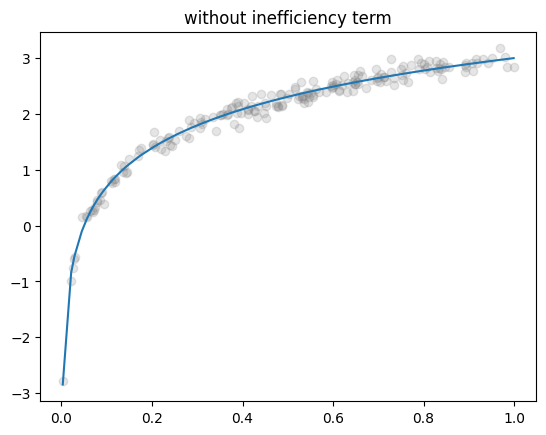

In [20]:
y = y_true - eps
plt.scatter(x,y, color = "gray", alpha = 0.2) # without 
plt.plot(x,y_true)
plt.title("without inefficiency term")

Text(0.5, 1.0, 'with additional inefficiency term')

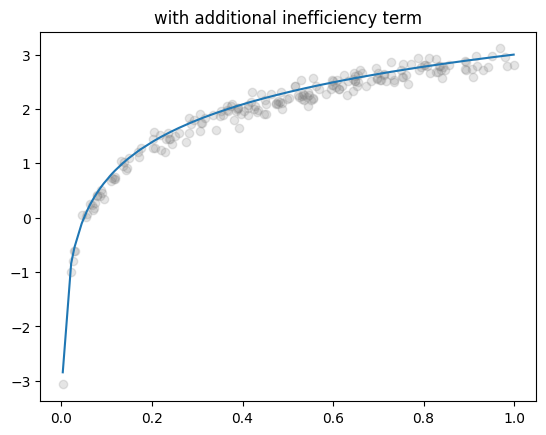

In [22]:
y = y_true - eps - u # with u term
plt.scatter(x,y, color = "gray", alpha = 0.2)
plt.plot(x,y_true)
plt.title("with additional inefficiency term")

## Larger Variance (var = 1)

In [23]:
scale = 1
n_sample = 200
x = np.sort(np.random.uniform(low=0, high=1, size=n_sample)) # 
u = np.abs(np.random.normal(loc=0, scale=scale, size=n_sample)) # (U_scale)
eps = np.random.normal(loc=0, scale=scale, size=n_sample)

# elif (type == "heterosk"): # Heteroskedastic and increasing variance scale with X 
#     se = np.sqrt(x*scale)
#     eps = np.random.normal(loc=0, scale = se, size=n_sample)
# else:
#     print('Invalid !!') 
y_true = 3 + np.log(x)

Text(0.5, 1.0, 'without inefficiency term')

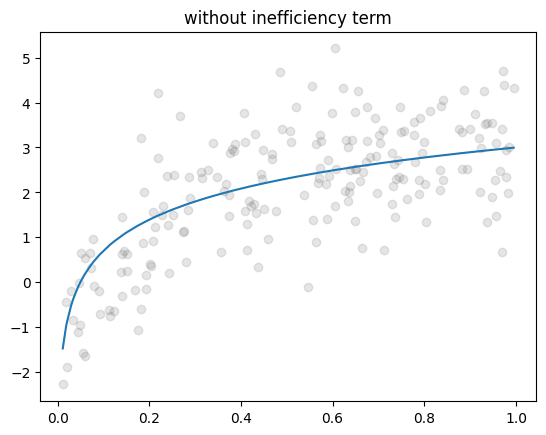

In [24]:
y = y_true - eps
plt.scatter(x,y, color = "gray", alpha = 0.2) # without 
plt.plot(x,y_true)
plt.title("without inefficiency term")

Text(0.5, 1.0, 'with additional inefficiency term')

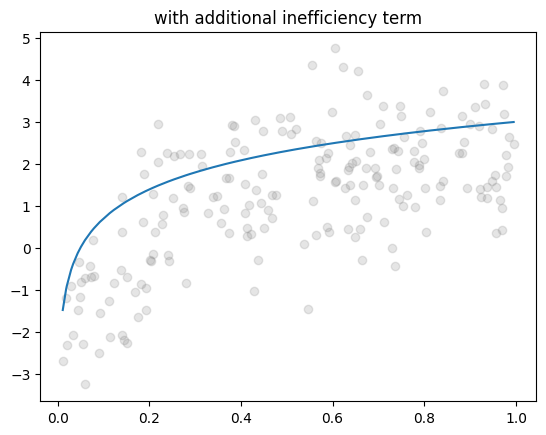

In [27]:
y = y_true - eps - u # with u term
plt.scatter(x,y, color = "gray", alpha = 0.2)
plt.plot(x,y_true)
plt.title("with additional inefficiency term")

## Result for Stoned 

In [4]:
df_st = data_.stoned_(method_=RED_QLE,df = df)
df_st_mom = data_.stoned_(method_=RED_MOM,df = df)


Estimating the additive model remotely with mosek solver.
Estimating the additive model remotely with mosek solver.


In [5]:
df_st.head()

,x_hor,y,y_cnls,y_mod
0,0.014795,-1.232195,-1.231916,-1.221204
1,0.015566,-1.165870,-1.165869,-1.155158
2,0.016417,-1.108050,-1.108278,-1.097567
3,0.020483,-0.902917,-0.902925,-0.892213
4,0.024362,-0.715443,-0.715044,-0.704332


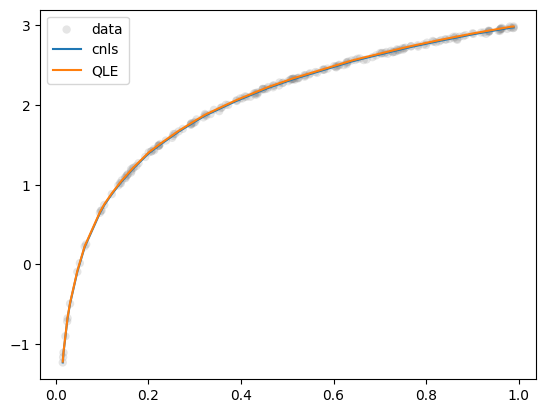

In [6]:
df_st = df_st
plt.scatter(df_st['x_hor'], df_st['y'], color="gray", edgecolor="none", alpha=0.2) 
plt.plot(df_st['x_hor'], df_st['y_cnls'])
plt.plot(df_st['x_hor'], df_st['y_mod'])
plt.legend(['data','cnls','QLE'])
# plt.grid()

## Result for SFMA

In [7]:
df_sfa = data_.sfma_(df)
df_sfa

,x,pred
0,0.014795,-0.990555
1,0.019692,-0.833273
2,0.024590,-0.684074
3,0.029487,-0.542709
4,0.034385,-0.408929
...,...,...
195,0.969797,2.984087
196,0.974695,2.989584
197,0.979592,2.995082
198,0.984490,3.000579


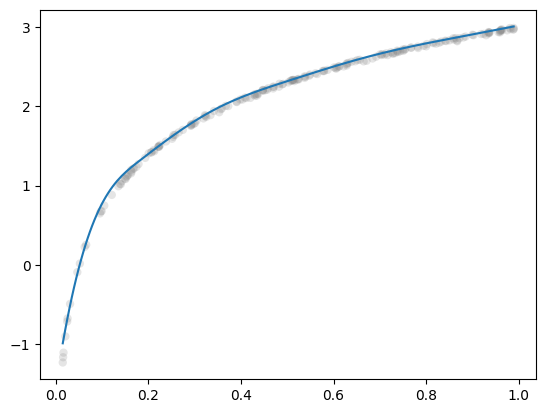

In [8]:
plt.scatter(df['x'], df['y'], color="gray", edgecolor="none", alpha=0.2) 
plt.plot(df_sfa['x'], df_sfa['pred'])


## Comparing results (SFMA vs StoNED)

## Homoskedastic variance

In [26]:
plt.scatter(df['x'], df['y'],  color="gray", edgecolor="none", alpha=0.2)
plt.plot(df_sfa['x'],df_sfa['pred'])
plt.plot(df['x'],df['y_true'])
plt.plot(df_st['x_hor'], df_st['y_mod'])
plt.plot(df_st_mom['x_hor'], df_st['y_mod'])
plt.plot(df_st['x_hor'], df_st['y_cnls'])
plt.legend(['data_points','sfma','True function','QLE','MOM','CNLS'])
plt.grid()

NameError: name 'df' is not defined

In [10]:
mse_QLE = mean_squared_error(df_st['y_mod'], df['y_true'])
mse_MOM = mean_squared_error(df_st_mom['y_mod'], df['y_true'])
mse_cnls = mean_squared_error(df_st['y_cnls'], df['y_true'])
mse_sfma = mean_squared_error(df_sfa['pred'], df['y_true'])
print('mse_QLE:',mse_QLE)
print('mse_MOM:',mse_MOM)
print('mse_cnls:',mse_cnls)
print('mse_sfma:',mse_sfma)

mse_QLE: 2.545286717585246e-05
mse_MOM: 2.3936869725428408e-05
mse_cnls: 5.753869987022634e-05
mse_sfma: 0.008719400945583643


## Heteroskedastic (Increasing scale variance wrt. X)

In [11]:
data_ = comp_sfa()
df = data_.generate_(type = "heterosk",scale=0.01, draws = 200, u_scale = 0.01)
df_st = data_.stoned_(method_=RED_QLE,df = df)
df_st_mom = data_.stoned_(method_=RED_MOM,df = df)
df_sfa = data_.sfma_(df)

Estimating the additive model remotely with mosek solver.
Estimating the additive model remotely with mosek solver.


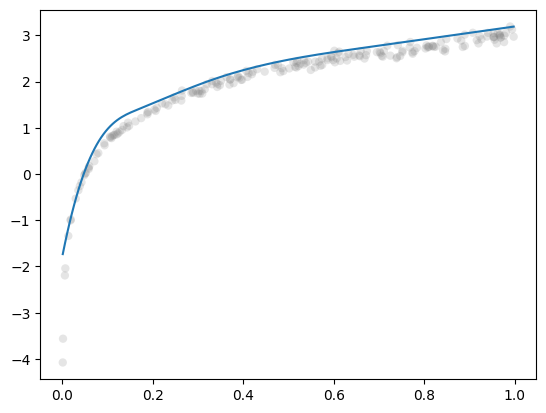

In [12]:
plt.scatter(df['x'], df['y'], color="gray", edgecolor="none", alpha=0.2) 
plt.plot(df_sfa['x'], df_sfa['pred'])

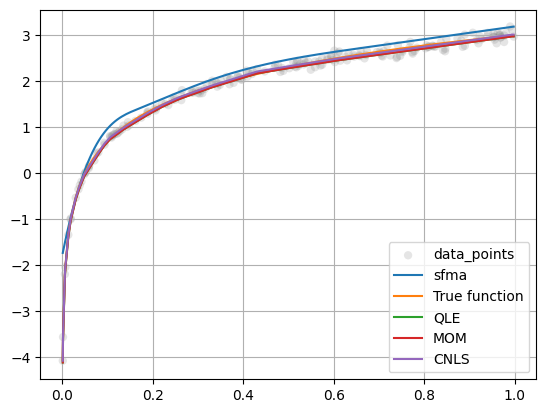

In [13]:
plt.scatter(df['x'], df['y'],  color="gray", edgecolor="none", alpha=0.2)
plt.plot(df_sfa['x'],df_sfa['pred'])
plt.plot(df['x'],df['y_true'])
plt.plot(df_st['x_hor'], df_st['y_mod'])
plt.plot(df_st_mom['x_hor'], df_st['y_mod'])
plt.plot(df_st['x_hor'], df_st['y_cnls'])
plt.legend(['data_points','sfma','True function','QLE','MOM','CNLS'])
plt.grid()



In [14]:
mse_QLE = mean_squared_error(df_st['y_mod'], df['y_true'])
mse_MOM = mean_squared_error(df_st_mom['y_mod'], df['y_true'])
mse_cnls = mean_squared_error(df_st['y_cnls'], df['y_true'])
mse_sfma = mean_squared_error(df_sfa['pred'], df['y_true'])
print('mse_QLE:',mse_QLE)
print('mse_MOM:',mse_MOM)
print('mse_cnls:',mse_cnls)
print('mse_sfma:',mse_sfma)

mse_QLE: 0.0020231255770683508
mse_MOM: 0.0003668245301076617
mse_cnls: 0.0003668245301076617
mse_sfma: 0.09921799898758377


## END

In [11]:
model.fit(outlier_pct=0.0, trim_verbose=True, trim_max_iter=15, trim_step_size=2.0,
          eta_options={"method": "bounded", "bounds": [0.0, 1.0]})

In [12]:
df_pred = pd.DataFrame({
    x_var: np.linspace(df[x_var].min(), df[x_var].max(), 100)
})
df_pred["pred"] = model.predict(df_pred)

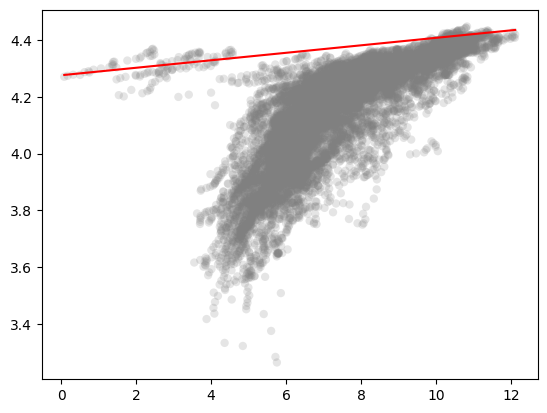

In [13]:
fig, ax = plt.subplots()
outlier_indices = model.weights == 0.0
ax.scatter(df[x_var], df[y_var], color="gray", edgecolor="none", alpha=0.2)
ax.scatter(df[x_var][outlier_indices], df[y_var][outlier_indices], color="red", marker="x", alpha=0.2)
ax.plot(df_pred[x_var], df_pred.pred, color="red")

Estimating the additive model remotely with mosek solver.


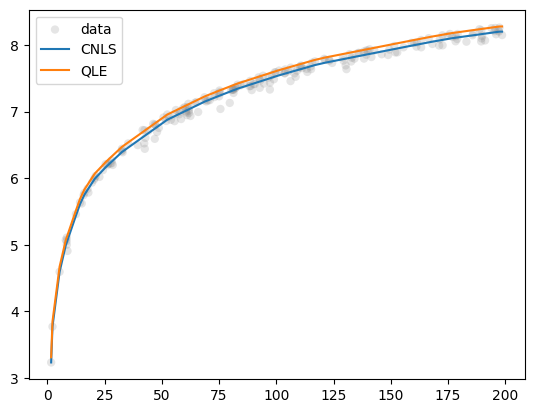

In [27]:
        
    draws = 200
    scale = 0.1
    x = np.sort(np.random.uniform(low=1, high=draws, size=draws))
    u = np.abs(np.random.normal(loc=0, scale=scale, size=draws))
    y_true = 3 + np.log(x)
    y = y_true - u
    model = CNLS.CNLS(y, x, z=None, cet = CET_ADDI, fun = FUN_PROD, rts = RTS_VRS)
    model.optimize('nahomw@uw.edu')
    xx = np.array(model.get_frontier()).T
    xx = np.array(xx).T
    rd = StoNED.StoNED(model)
    xy = np.array(StoNED.StoNED.get_frontier(rd,method=RED_QLE)).T       
    x = np.array(model.x).T[0]
#     y_cnls = pd.DataFrame(xx)
#     y_mod = pd.DataFrame(xy)
#     x_hor = pd.DataFrame(x)
#     y = pd.DataFrame(y)
#     val_mod = pd.concat([x_hor,y,y_cnls,y_mod],axis = 1)
#     val_mod.columns = ['x_hor','y','y_cnls','y_mod']
    plt.scatter(x, y,  color="gray", edgecolor="none", alpha=0.2)
    plt.plot(x,xx)
    plt.plot(x,xy)
    
#     plt.plot(df['x'],df['y_true'])
#     plt.plot(df_st['x_hor'], df_st['y_mod'])
#     plt.plot(df_st['x_hor'], df_st['y_cnls'])
    plt.legend(['data','CNLS','QLE'])
#     plt.grid()
